<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#class_weigh" data-toc-modified-id="class_weigh-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>class_weigh</a></span></li><li><span><a href="#Увелечение-выборки" data-toc-modified-id="Увелечение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увелечение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Порог-классификации" data-toc-modified-id="Порог-классификации-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Порог классификации</a></span></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных:

**Признаки:**

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак:**

* Exited — факт ухода клиента

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc

## Подготовка данных

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [ ]:
df.isna().mean()

RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


После предварительного просмотра базы данный стали виды ее проблемы которые помешают в дальнейшей работе.

* Пропуски в столбце `Tensure` 
* Излишнии столбцы  `RowNumber`, `CustomerId`, `Surname`
* И столбцы с категоральными признаками `Geography` и `Gender`

Займемся подготовкой датафрейма

In [ ]:
# Удалим лишнии столбцы 
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [ ]:
df['Tenure'].value_counts('mean', ascending=False)  # Посморим на пропуски

1.0     0.104719
2.0     0.104499
8.0     0.102629
3.0     0.102079
5.0     0.101969
7.0     0.101749
4.0     0.097349
9.0     0.097019
6.0     0.096909
10.0    0.049060
0.0     0.042020
Name: Tenure, dtype: float64

Пропуски в колонке `Tenure` я заполню 0 так как в талибце в самой меньшей доле уже присутсвуют значения 0
(Предположу что это люди которые являются клиентами банка меньше года)

In [ ]:
df['Tenure'].fillna(0, inplace=True)

При помощи прямого кодирования, преобразуем категориальные признаки в численные.

In [ ]:
df_ohe = pd.get_dummies(df, drop_first=True)

In [ ]:
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Из общей даты выделим признаки и целевой признак.

In [ ]:
target = df_ohe['Exited']
features = df_ohe.drop(['Exited'], axis=1)

И далее разобьем на 3 выборки обучающую, валидационную и тестовую.

In [ ]:
features_train, features_rest, target_train, target_rest = train_test_split(
    features, target, test_size=0.4, random_state=1)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_rest, target_rest, test_size=0.5, random_state=1)

In [ ]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


Масштабируем признаки методом стандартизации.

In [ ]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Вывод: 

1. Ознакомились с данными, выявили их проблемы


2. Обработали пропуски в столбце `Tenure `, удалили лишнии данные `RowNumber`, `CustomerId`, `Surname`


3. Преобразовали категоральные данные в столбцах `Geography` и `Gender` при помощи прямого кодирования One-Hot Encoding


4. Разбили данные на выборки 
 - обучающую - 60%  
 - валидационную - 20% 
 - тестовую - 20%


5. Маштабировали признаки методом стандартизации.

## Исследование задачи

Обучим 2 модели `RandomForestClassifier` и `LogisticRegression` и посмотрим на их результаты без предварительной оценки баланса классов.

###  RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=12)
model.fit(features_train, target_train)
predicted_valid_forest = pd.Series(model.predict(features_valid))
model.score(features_valid, target_valid)

0.864

### LogisticRegression

In [ ]:
model = LogisticRegression(random_state=1, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid_regression = pd.Series(model.predict(features_valid))
model.score(features_valid, target_valid)

0.81

Лучше всего себя показала модель RandomForestClassifier, доля правильных ответов - 86%.
Нам необходимо понять хороший ли это результат.

Исследуем целевой признак. Чтобы оценить адекватность модели, проверим, как часто в целевом признаке `Exited` встречается класс «1» или «0».

###  Баланс классов

0    0.7963
1    0.2037
Name: Exited, dtype: float64


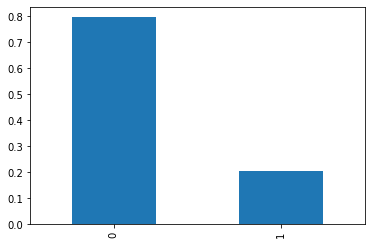

In [ ]:
class_exited = df['Exited'].value_counts(normalize=True)
class_exited.plot(kind='bar');
print(class_exited)

Видим что классы не сбалансированны. Клиенты уходят примерно в 20% случаев.

Посмсотрим на частоты классов в результатах предсказаний обеих моделей.


0    0.933
1    0.067
dtype: float64


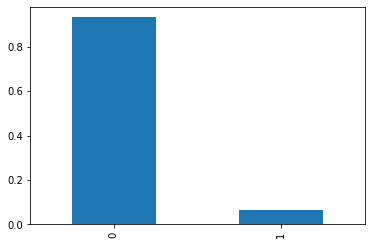

In [ ]:
class_exited = predicted_valid_regression.value_counts(normalize=True)
class_exited.plot(kind='bar');
print(class_exited)

0    0.886
1    0.114
dtype: float64


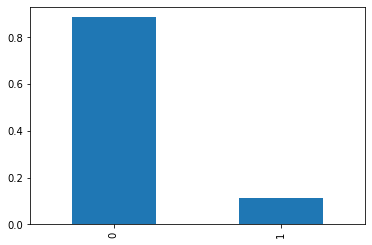

In [ ]:
class_exited = predicted_valid_forest.value_counts(normalize=True)
class_exited.plot(kind='bar');
print(class_exited)

Модели предсказывают более оптимистичный рассклад.

Сравним их работу с константной моделью.

In [ ]:
const = pd.Series(0, target.index)
accuracy_score(target, const)

0.7963

Построенные модели предсказывают уход клиентов лучше, чем константная модель, они адекватны. Но можно улучшить результат.

Применим меру-F1, чтобы оценить качество прогноза положительного класса у моделей.

In [ ]:
f1_score(target_valid, predicted_valid_regression)

0.31407942238267145

In [ ]:
f1_score(target_valid, predicted_valid_forest)

0.5802469135802469

### Вывод:

* Обучили 2 модели `RandomForestClassifier` и `LogisticRegression` первая показала лучший результат.
* Посмотрели на баланс классов, классы разлицаються набором в 4 раза.
* Выяснили что клиенты уходят в 20% случаев.

Для выполнения поставленной задачи необходимо достичь меры-F1 не менее 0.59

## Борьба с дисбалансом

Попробуем несколько способов для решения проблемы с дисбалансом классов

### class_weigh

In [ ]:
model = LogisticRegression(random_state=1, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_regress = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_regress))

F1: 0.49367088607594933


In [ ]:
model = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=12, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_forest = pd.Series(model.predict(features_valid))

print("F1:", f1_score(target_valid, predicted_valid_forest))

F1: 0.6103542234332425


Метод `class_weigh` помогли модели `RandomForestClassifier` достичь меры-F1 достичь значения 0.61. Так же немного увелечила значение F1 в модели `LogisticRegression`. 

Продолжим пробовать разные методы борьбы с дисбалансом классов

### Увелечение выборки

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones]* repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]* repeat )
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

In [ ]:
model = LogisticRegression(random_state=1,solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid_regress = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_regress))

F1: 0.48687350835322196


In [ ]:
model = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=12)
model.fit(features_upsampled, target_upsampled)
predicted_valid_forest = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_forest))

F1: 0.6257378984651711


Увелечение выборки дало результаты немного хуже метода `class_weigh` 
* `RandomForestClassifier` - 0.42
* `LogisticRegression` - 0.60

### Уменьшение выборки

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=1)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=1)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.24)

In [ ]:
target_train.value_counts() # оригинал 

0    4804
1    1196
Name: Exited, dtype: int64

In [ ]:
target_downsampled.value_counts() # Уменьшение 

1    1196
0    1153
Name: Exited, dtype: int64

In [ ]:
target_upsampled.value_counts()

1    5980
0    4804
Name: Exited, dtype: int64

In [ ]:
model = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=12)
model.fit(features_downsampled, target_downsampled)
predicted_valid_forest = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_forest))

F1: 0.6048309178743962


In [ ]:
model = LogisticRegression(random_state=1,solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid_regress = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid_regress))

F1: 0.49420160570918825


У меньшение выборки показло результаты далекие от желаемых.

### Порог классификации

In [ ]:
def count_thr(probabilities_valid):
    for thr in np.arange(0, 0.5, 0.05):
        predicted_valid = probabilities_valid > thr
        f1 = f1_score(target_valid, predicted_valid)
        print("Порог = {:.2f} | F1 = {:.3f}".format(
        thr, f1))

In [ ]:
model = LogisticRegression(random_state=1,solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid_regress = model.predict_proba(features_valid)[:,1]

In [ ]:
count_thr(probabilities_valid_regress)

Порог = 0.00 | F1 = 0.347
Порог = 0.05 | F1 = 0.376
Порог = 0.10 | F1 = 0.435
Порог = 0.15 | F1 = 0.474
Порог = 0.20 | F1 = 0.488
Порог = 0.25 | F1 = 0.479
Порог = 0.30 | F1 = 0.474
Порог = 0.35 | F1 = 0.444
Порог = 0.40 | F1 = 0.412
Порог = 0.45 | F1 = 0.356


In [ ]:
model = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=12)
model.fit(features_train, target_train)
probabilities_valid_forest = model.predict_proba(features_valid)[:,1]

In [ ]:
count_thr(probabilities_valid_forest)

Порог = 0.00 | F1 = 0.347
Порог = 0.05 | F1 = 0.423
Порог = 0.10 | F1 = 0.502
Порог = 0.15 | F1 = 0.565
Порог = 0.20 | F1 = 0.600
Порог = 0.25 | F1 = 0.614
Порог = 0.30 | F1 = 0.617
Порог = 0.35 | F1 = 0.609
Порог = 0.40 | F1 = 0.595
Порог = 0.45 | F1 = 0.578


Изменение порога показывает результаты лучше чем уменьшенее выборки, но неиже чем class_weigh и увелечение выборки.

Попробуем подобрать лучшие значения для параметров `n_estimators` и `max_depth` в `RandomForestClassifier`

### Подбор гиперпараметров

In [ ]:
for depth in range(10,24,2):
    for estim in range(100,1001,100):
        model = RandomForestClassifier(random_state=1, n_estimators=estim, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_train_def = model.predict(features_train)
        predictions_valid_def = model.predict(features_valid)
        print("Accuracy при max_depth = {:.2f} и при n_estimators = {:.3f}".format(
        depth, estim))
        print("Обучающая выборка:", accuracy_score(target_train, predictions_train_def))
        print("Валидационная выборка:", accuracy_score(target_valid, predictions_valid_def))
        print()
        

Accuracy при max_depth = 10.00 и при n_estimators = 100.000
Обучающая выборка: 0.909
Валидационная выборка: 0.8645

Accuracy при max_depth = 10.00 и при n_estimators = 200.000
Обучающая выборка: 0.9076666666666666
Валидационная выборка: 0.8645

Accuracy при max_depth = 10.00 и при n_estimators = 300.000
Обучающая выборка: 0.9076666666666666
Валидационная выборка: 0.864

Accuracy при max_depth = 10.00 и при n_estimators = 400.000
Обучающая выборка: 0.9075
Валидационная выборка: 0.865

Accuracy при max_depth = 10.00 и при n_estimators = 500.000
Обучающая выборка: 0.908
Валидационная выборка: 0.8655

Accuracy при max_depth = 10.00 и при n_estimators = 600.000
Обучающая выборка: 0.9076666666666666
Валидационная выборка: 0.866

Accuracy при max_depth = 10.00 и при n_estimators = 700.000
Обучающая выборка: 0.9075
Валидационная выборка: 0.8655

Accuracy при max_depth = 10.00 и при n_estimators = 800.000
Обучающая выборка: 0.9073333333333333
Валидационная выборка: 0.8655

Accuracy при max_dept

В уровновешевании классов помог метод `class_weight` в модели `RandomForestClassifier`

Лучшие результаты модель показала при гиперпараметрах `n_estimators`= 100, `max_depth` = 12

## Тестирование модели

Обучим финальную модель и проверим ее на тестовой выборке 

In [ ]:
model_final = RandomForestClassifier(random_state=1, n_estimators=100, max_depth = 12, class_weight='balanced')
model_final.fit(features_train, target_train)
predicted_test = model_final.predict(features_test)
f1_score(target_test, predicted_test)

0.6176084099868593

Нужная F1 мера достигнута.

Посчитаем площадь под ROC-кривой для модели (AUC-ROC), чтобы узнать, насколько сильно ее точность отличается от случайной.

In [ ]:
probabilities_valid_final = model_final.predict_proba(features_test)[:, 1]
roc_auc_score(target_test, probabilities_valid_final)

0.8594498156474752

Метрика AUC-ROC отличается от значения для случайной модели (0.86). 

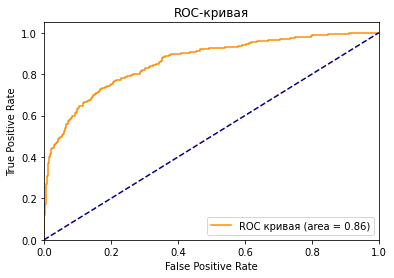

In [ ]:
fpr, tpr, treshold = roc_curve(target_test, probabilities_valid_final)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

## Общий вывод:

1. Ознакомились с данными и подготовили их к исследованию (преобразовали категориальные признаки в численные с помощью техники прямого кодирования One-Hot Encoding,разбили получившийся датасет на 3 выборки - обучающую, валидационную и тестовую, масштабировали признаки методом стандартизации).


2. Исследовали баланс классов - они оказались несбалансированы, изучили модели без учёта дисбаланса, выяснили, что результат работы модели случайного леса лучше.


3. Применили 4 способа борбы с дисбалансом - аргумент class_weight, увелечение выборки, уменьшение выборки и изменение порога. Лучшие результаты показал способы борьбы с дисбалансом class_weight. Выявили лучшие значения n_estimators и max_depth для модели случайного леса.


4. Обучили финальную модель и проверили ее на тестовой выборке. Достигли значения F1 = 0.61. Исследовали метрику AUC-ROC - ее значение в данном случае почти не отличается от значения для случайной модели (0.86)